In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

warnings.filterwarnings("ignore")


In [39]:
def data_wrangling(path):

    df = pd.read_csv(path)
    # converting age to integer
    df["person_age"] = df["person_age"].astype('int')
    # create masks to avoid outliers
    income_mask = df["person_income"]<= 100000.00
    age_mask = df["person_age"] <= 100
    exp_mask = df["person_emp_exp"] <= 70
    df = df[income_mask & age_mask & exp_mask]
    return df

In [40]:
df = data_wrangling("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [41]:

numerical_columns = [var for var in df.columns if df[var].dtype in("float64","int64")]
categorical_columns = [var for var in df.columns if df[var].dtype not in("float64","int64")]
print(f"Numerical columns: {numerical_columns}")
print(f"\nCategorical columns: {categorical_columns}")

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


## Gender

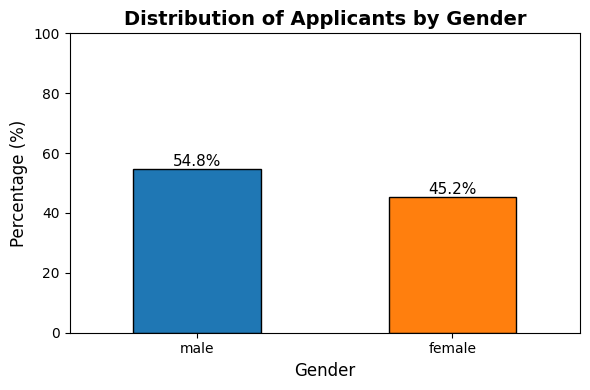

In [42]:

# Calculate percentages
gender_percent = df['person_gender'].value_counts(normalize=True) * 100

# Plot
ax = gender_percent.plot(
    kind='bar', 
    color=['#1f77b4', '#ff7f0e'],  # custom colors
    edgecolor='black',
    figsize=(6,4)
)

# Labels and title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Applicants by Gender", fontsize=14, fontweight='bold')

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=0) 
plt.ylim(0, 100)        
plt.tight_layout()
plt.show()


In [43]:
df.groupby("person_gender")["loan_status"].value_counts(normalize=True)

person_gender  loan_status
female         0              0.742211
               1              0.257789
male           0              0.740209
               1              0.259791
Name: proportion, dtype: float64

The results shows that there is no gender bias in our dataset

## Age

Here we're going to check the max, min and average age of people included in the dataset

In [44]:
print(f"the minimum age is {df["person_age"].min()}")
print(f"the maximum age is {df["person_age"].max()}")
print(f"the average age is {df["person_age"].mean()}")

the minimum age is 20
the maximum age is 80
the average age is 27.44903211048523


In [45]:
age_list = []
for age in df["person_age"]:
    if age >= 20 and age <30:
        age = "20-30"
    elif age >=30 and age < 40:
        age = "30-40"
    elif age >=40 and age < 50:
        age = "40-50"
    elif age >=50 and age < 60:
        age = "50-60"
    else:
        age = ">60"
    age_list.append(age)

df["age_bins"] = age_list
df["age_bins"].value_counts()

age_bins
20-30    25812
30-40     7595
40-50     1301
50-60      205
>60         60
Name: count, dtype: int64

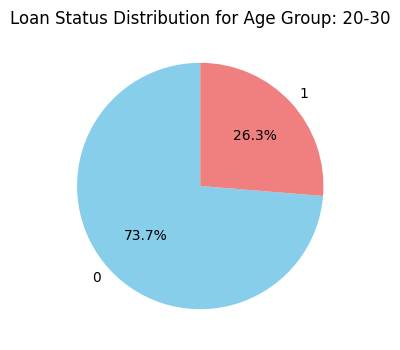

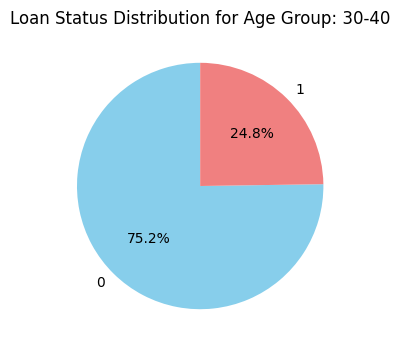

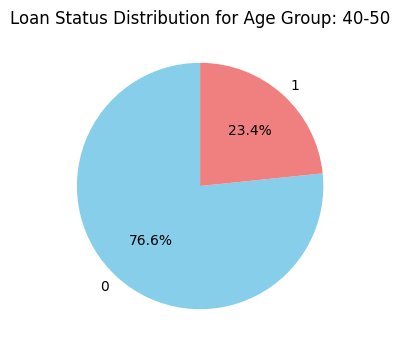

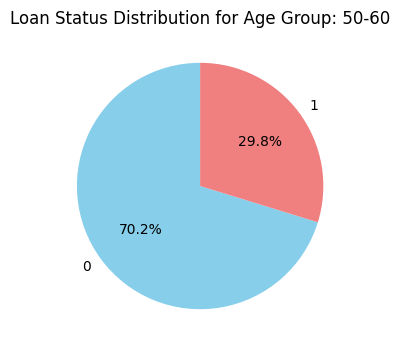

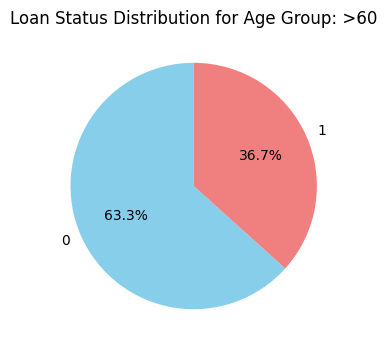

In [46]:

# Get normalized percentages
grouped = df.groupby("age_bins")["loan_status"].value_counts(normalize=True).unstack() * 100

# Create one pie per age bin
for age_bin in grouped.index:
    values = grouped.loc[age_bin]
    plt.figure(figsize=(4, 4))
    plt.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral']  # optional
    )
    plt.title(f"Loan Status Distribution for Age Group: {age_bin}")
    plt.show()


In [47]:
df["loan_status"].value_counts(normalize=True).round(2) * 100

loan_status
0    74.0
1    26.0
Name: proportion, dtype: float64

There is no significant difference in the distribution of approved and refused loans across different age groups. Overall, approximately two-thirds of the applications were refused, while only one-third were approved.

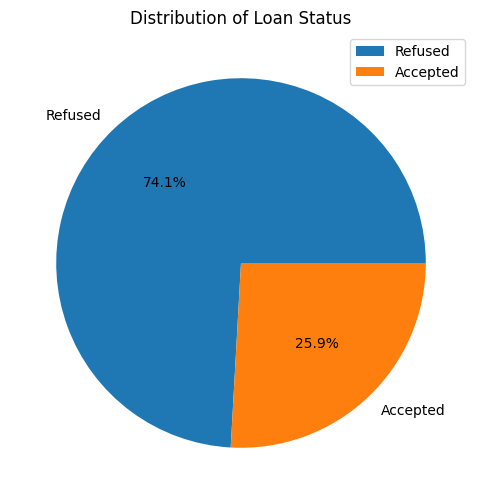

In [48]:
counts = df["loan_status"].value_counts()
custom_labels = ['Accepted' if x==1 else 'Refused' for x in counts.index]

#plot a pie chart 
plt.figure(figsize=(6,6))
plt.pie(counts,labels=custom_labels,autopct='%1.1f%%')

#add title
plt.title("Distribution of Loan Status")

plt.legend(loc="best")
plt.show()

## Income

In [49]:
print(f"the minimum income is {df["person_income"].min()}")
print(f"the maximum income is {df["person_income"].max()}")
print(f"the average income is {df["person_income"].mean()}") 

the minimum income is 8000.0
the maximum income is 99997.0
the average income is 58891.54787979298


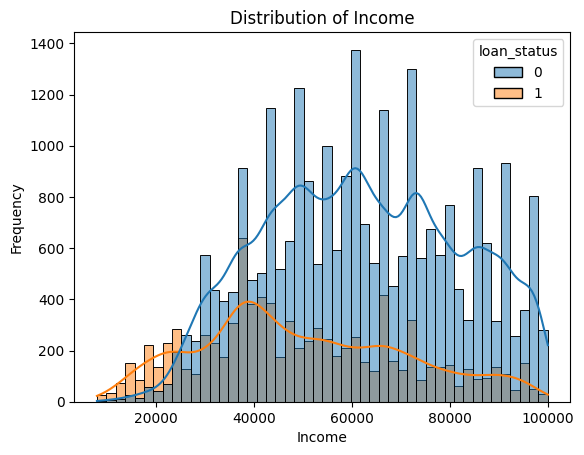

In [50]:
sns.histplot(df,x="person_income",kde=True,hue="loan_status")

# add labels

plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Income")
plt.show()

- In contrast to our guts the histogram shows that higher incomes are mostly associated with refused loans.
- This pattern may indicate that income alone isn’t the key deciding factor, or that the approval process involves other variables


## Home Ownership

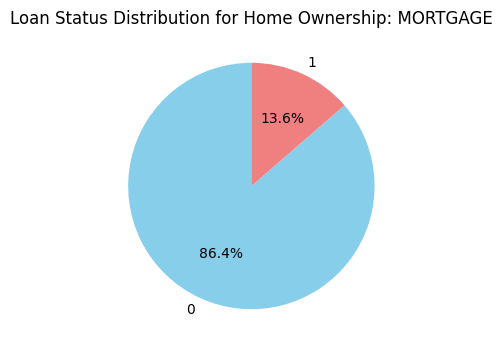

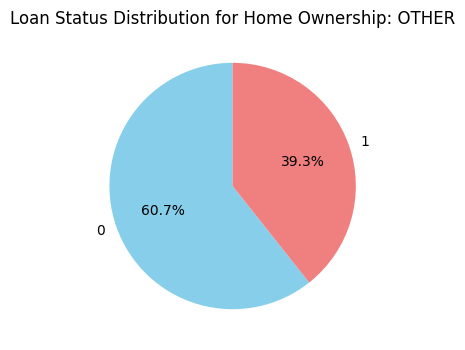

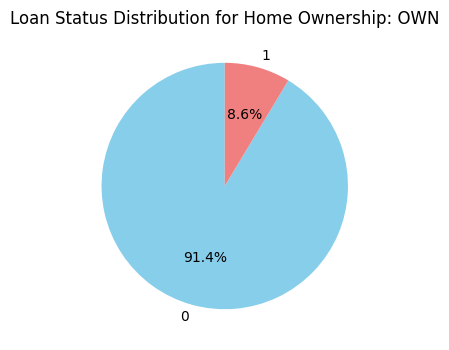

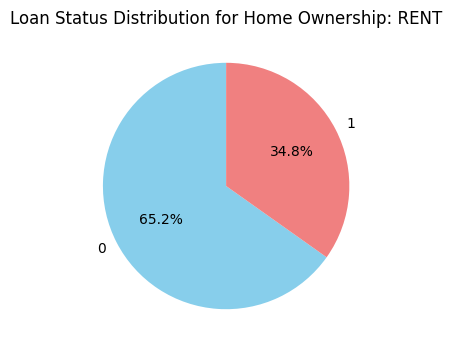

In [51]:
grouped = df.groupby("person_home_ownership")["loan_status"].value_counts(normalize=True).unstack() * 100
for home in grouped.index:
    values = grouped.loc[home]
    plt.figure(figsize=(4, 4))
    plt.pie(
            values,
            labels=values.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['skyblue', 'lightcoral']  # optional
        )
    plt.title(f"Loan Status Distribution for Home Ownership: {home}")
    plt.show()

## Previous Loan Defaults

In [52]:

df["previous_loan_defaults_on_file"] = df["previous_loan_defaults_on_file"].replace({"No":0,"Yes":1}).astype("int")
print(df.groupby("previous_loan_defaults_on_file")["loan_status"].value_counts(normalize=True).round(2) * 100)


previous_loan_defaults_on_file  loan_status
0                               1               50.0
                                0               50.0
1                               0              100.0
Name: proportion, dtype: float64


In [53]:
df.previous_loan_defaults_on_file.corr(df.loan_status)

np.float64(-0.5757331199627053)

The variable **previous_loan_defaults_on_file** perfectly predicts loan refusal — applicants with a past default were all refused. While this feature strongly enhances model performance, it might also cause overfitting or obscure the impact of other predictors.

## Loan Intent

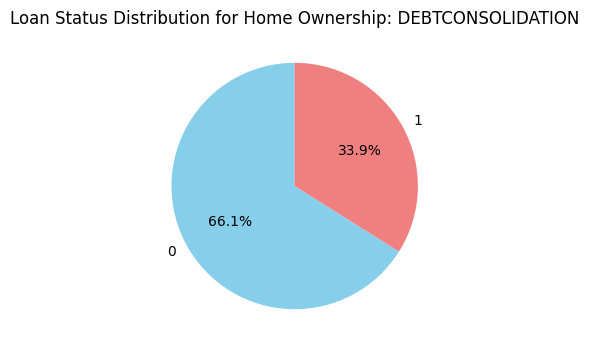

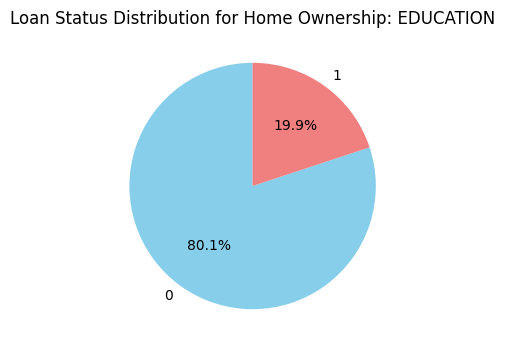

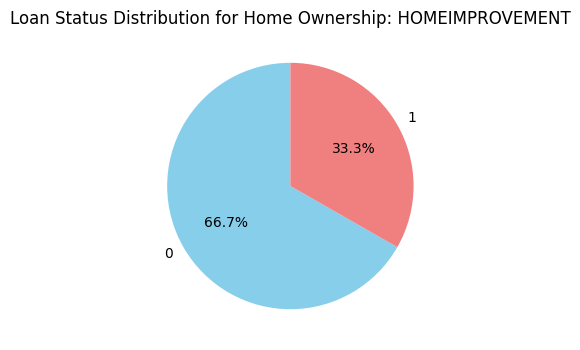

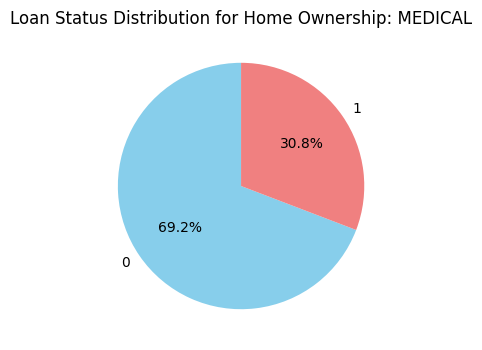

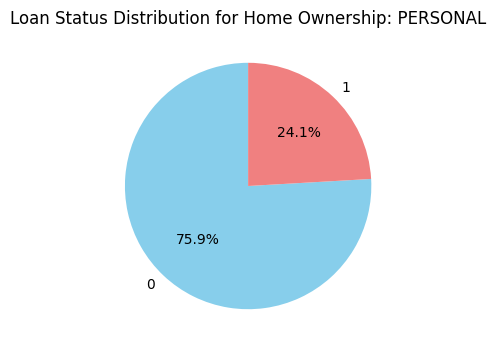

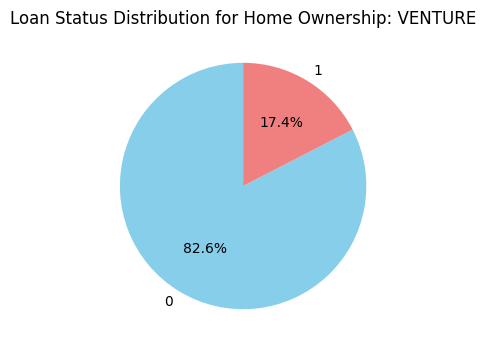

In [54]:
grouped = df.groupby("loan_intent")["loan_status"].value_counts(normalize=True).unstack() *100 

for intent in grouped.index:
    values = grouped.loc[intent]
    plt.figure(figsize=(4, 4))
    plt.pie(
            values,
            labels=values.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=['skyblue', 'lightcoral']  # optional
        )
    plt.title(f"Loan Status Distribution for Home Ownership: {intent}")
    plt.show()

We can observe that loan applications for education and venture purposes have a particularly high refusal rate (over 80%). For other loan intents, the pattern remains consistent with previous findings — approximately two-thirds of applications are refused.

## Employment Experience (Years)

<Axes: xlabel='experience_category'>

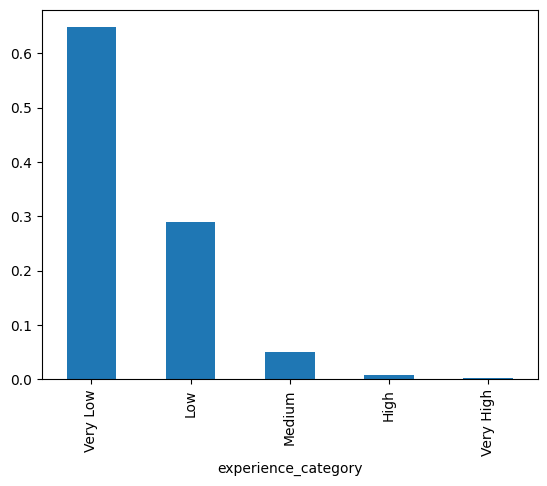

In [55]:

emp_exp_bin = []

# Loop and categorize
for exp in df["person_emp_exp"]:
    if exp <= 5:
        emp_exp_bin.append('Very Low')
    elif exp <= 15:
        emp_exp_bin.append('Low')
    elif exp <= 25:
        emp_exp_bin.append('Medium')
    elif exp <= 35:
        emp_exp_bin.append('High')
    else:
        emp_exp_bin.append('Very High')

df["experience_category"] = emp_exp_bin
df["experience_category"].value_counts(normalize=True).plot(kind='bar')

In [56]:
df.groupby("experience_category")["loan_status"].value_counts(normalize=True).round(2)

experience_category  loan_status
High                 0              0.69
                     1              0.31
Low                  0              0.75
                     1              0.25
Medium               0              0.77
                     1              0.23
Very High            0              0.69
                     1              0.31
Very Low             0              0.74
                     1              0.26
Name: proportion, dtype: float64

## Credit Score

In [57]:
credit_bin = []

for score in df["credit_score"]:
    if score <= 579:
        credit_bin.append('Very Poor')
    elif score <= 669:
        credit_bin.append('Fair')
    elif score <= 739:
        credit_bin.append('Good')
    elif score <= 799:
        credit_bin.append('Very Good')
    else:  # score == 800
        credit_bin.append('Excellent')

df["credit_score_category"] = credit_bin
df["credit_score_category"].value_counts()

credit_score_category
Fair         20972
Good          8533
Very Poor     5408
Very Good       60
Name: count, dtype: int64

In [58]:
df.groupby("credit_score_category")["loan_status"].value_counts(normalize=True).round(3) * 100

credit_score_category  loan_status
Fair                   0              74.0
                       1              26.0
Good                   0              74.5
                       1              25.5
Very Good              0              76.7
                       1              23.3
Very Poor              0              73.8
                       1              26.2
Name: proportion, dtype: float64

Even for the credit score the pattern remains consistent with previous findings — approximately two-thirds of applications are refused among all the groups 

## More Exploration

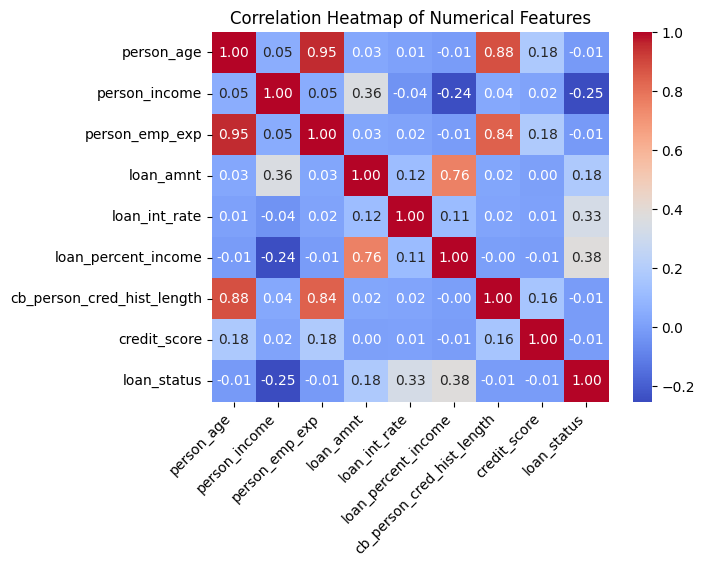

In [59]:
df_correlation = df[numerical_columns].corr()
sns.heatmap(df_correlation,annot= True,fmt=".2f",cmap="coolwarm")

plt.title("Correlation Heatmap of Numerical Features")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

From the heatmap we can notice a multicollinearity between **person_age**, **person_emp_exp** and **cb_person_cred_hist_length**.
It might be a good idea to drop some of those columns to avoid unstability

## Train the Data

In [60]:
# prepare the data for training
# remove 3 columns : person_age, person_gender, and person_emp_exp
df =df[['person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'person_income',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'loan_status']]

In [61]:
temp,test = train_test_split(df,test_size=0.20,stratify=df["loan_status"],shuffle=True,random_state=42)
train,val = train_test_split(temp,test_size=0.25,stratify=temp["loan_status"],random_state=42)
train.shape[0]/ len(df)* 100,val.shape[0]/ len(df)* 100,test.shape[0]/ len(df)* 100

(59.9977125210877, 20.00114373945615, 20.00114373945615)

In [62]:
df_train = train.reset_index(drop=True)
df_val = val.reset_index(drop=True)
df_test = test.reset_index(drop=True)

In [63]:
X_train = df_train.drop(columns="loan_status")
X_val = df_val.drop(columns="loan_status")
X_test = df_test.drop(columns="loan_status")
y_train = df_train["loan_status"].values
y_val = df_val["loan_status"].values
y_test = df_test["loan_status"].values


In [65]:
X_train.head()

,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,Master,RENT,PERSONAL,1,31278.0,4480.0,10.15,0.14,7.0,713
1,High School,RENT,PERSONAL,0,49105.0,3000.0,13.49,0.06,3.0,619
2,Bachelor,RENT,PERSONAL,1,66845.0,10000.0,7.51,0.15,3.0,660
3,High School,RENT,EDUCATION,1,36116.0,5000.0,10.49,0.14,7.0,651
4,Bachelor,RENT,PERSONAL,1,37024.0,5000.0,11.49,0.14,4.0,689


In [68]:
assert len(y_train) == len(X_train)
assert len(y_val) == len(X_val)
assert len(y_test) == len(X_test)